In [1]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
train = pd.read_csv('/Users/scottrichardson/Documents/Winter24/CP322-Machine-Learning/A2/CP322-MNIST/mnist_train.csv')
test = pd.read_csv('/Users/scottrichardson/Documents/Winter24/CP322-Machine-Learning/A2/CP322-MNIST/mnist_test.csv')

# Display the first few rows of the DataFrame
train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Filter the data for classes 0 to 4
train_filtered = train[train['label'].isin(range(5))]

# Split the data into features and target
X = train_filtered.drop('label', axis=1)
y = train_filtered['label']

# Split the train data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the classifier
clf = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=0.01, max_iter=1000, batch_size=100, early_stopping=True)

# Train the classifier
clf.fit(X_train, y_train)

# Prepare the test data
test = test[test['label'].isin(range(5))]
test = test.drop('label', axis=1)

# Test the classifier
y_pred = clf.predict(test)


/Users/scottrichardson/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/scottrichardson/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/scottrichardson/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/scottrichardson/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/scottrichardson/Library/Python/3.7/lib/python/site-packages/sklearn/b

Training error: 0.02019174898314935
Validation error: 0.030065359477124187


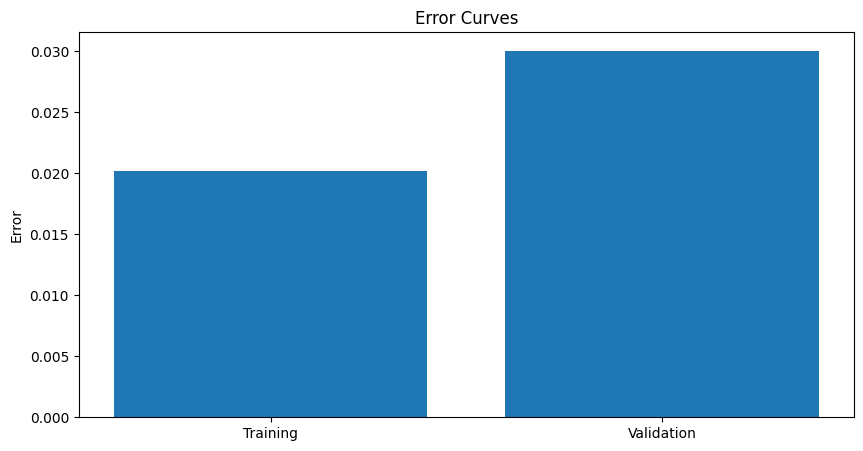

In [3]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate training error
train_pred = clf.predict(X_train)
train_error = 1 - accuracy_score(y_train, train_pred)

# Calculate validation error
validation_pred = clf.predict(X_validation)
validation_error = 1 - accuracy_score(y_validation, validation_pred)

# Print the errors
print(f'Training error: {train_error}')
print(f'Validation error: {validation_error}')

# Plot the error curves
plt.figure(figsize=(10, 5))
plt.bar(['Training', 'Validation'], [train_error, validation_error])

plt.ylabel('Error')
plt.title('Error Curves')
plt.show()


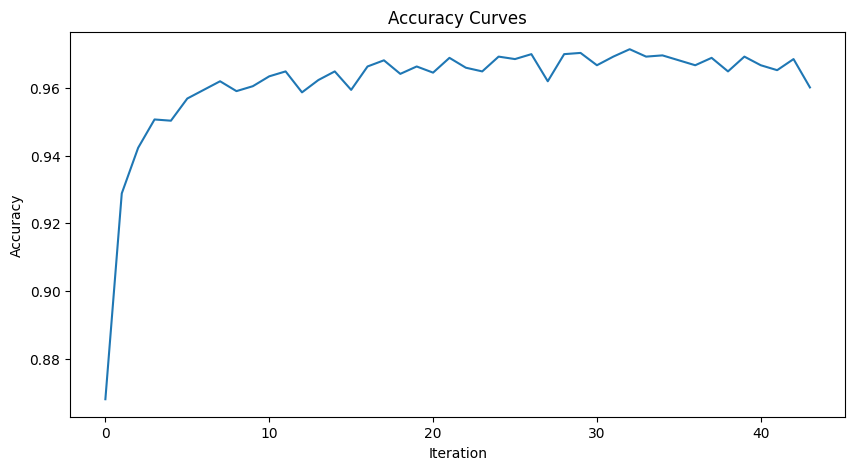

In [4]:
# Print the validation scores
# print(clf.validation_scores_)

# Plot the error curves
plt.figure(figsize=(10, 5))
plt.plot(clf.validation_scores_)

plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.title('Accuracy Curves')
plt.show()

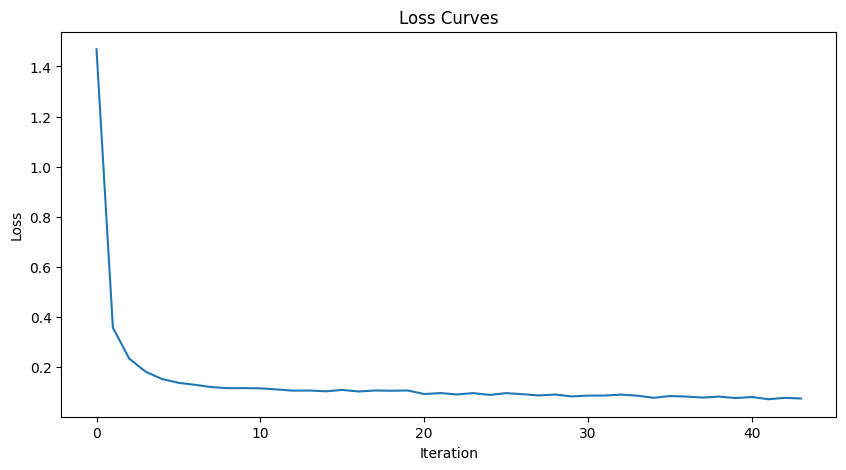

In [5]:
# Print the Loss curves
# print(clf.validation_scores_)

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(clf.loss_curve_)

plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.title('Loss Curves')
plt.show()

In [ ]:
# DOES NOT WORK. WILL INFINITELY RUN!!!
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=y_validation
)

Question 2. (D)
Represent the confusion matrix for your best network.

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import table
"""
confusion_matrix(y_true, y_pred)
Parameters:
    y_true: array-like of shape (n_samples)
            ground truth (correct) target values

    y_pred: array-like of shape (n_samples)
            estimated targets as returned by a classifier
"""

c_matrix = confusion_matrix(y_true, y_pred)
classes = ["0", "1", "2", "3", "4"]

display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = classes)

display.plot()
plt.show()

# for row in c_matrix:
#     print(*row, sep="\t")



